In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
import sklearn.metrics as sm
import pandas as pd
from sklearn import cluster
import numpy as np

In [4]:
mydata = pd.read_csv("../../assets/datasets/wine.csv")

In [5]:
mydata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


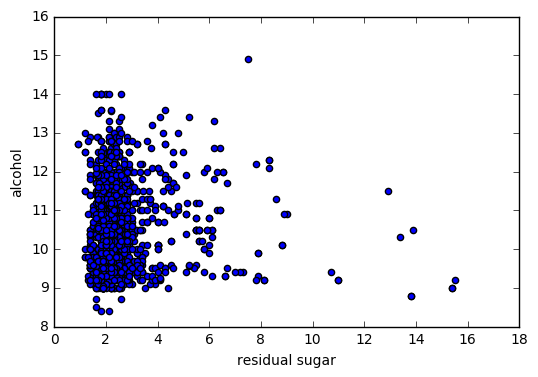

In [8]:
mydata.plot(kind='scatter', x = 'residual sugar', y = 'alcohol')

In [9]:
x = mydata[['fixed acidity','volatile acidity','citric acid','residual sugar',
           'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y = mydata['quality']

In [13]:
k = 8
kmeans = cluster.KMeans(n_clusters = k)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [15]:
print(labels)

[6 5 2 ..., 2 2 2]


In [18]:
predY = np.choose(labels, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).astype(np.int64)

In [19]:
predY

array([7, 6, 3, ..., 3, 3, 3])

In [21]:
sm.accuracy_score(y, predY)

0.065666041275797379

In [33]:
y.shape

(1599,)

In [34]:
predY.reshape(-1,1)

array([[7],
       [6],
       [3],
       ..., 
       [3],
       [3],
       [3]])

In [35]:
sm.silhouette_score(y, predY, metric='euclidean')

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 1599]